Kaggle has a nice 'getting started' competition for computer vision. The dataset is hand written single digits. 

# Needed Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
np.random.seed(6)

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

# Importing and preparing data 

In [7]:
# Import
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (42000, 785)
test shape: (28000, 784)


In [8]:
# separating target and features
y_train=train['label']
X_train=train.drop(columns=['label'])
del train
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (42000, 784)
y_train shape (42000,)


# EDA

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

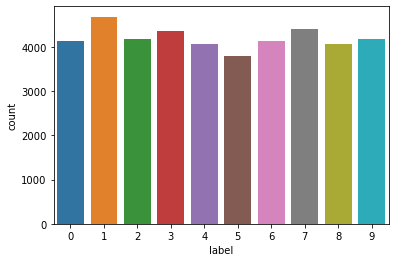

In [9]:
sns.countplot(y_train)
y_train.value_counts()

In [10]:
sets=[X_train,y_train,test]
str_sets=['X_train','y_train','test']
for i,name in zip(sets,str_sets):
    num=i.isnull().any().sum()
    print('There are {} missing values in {}'.format(num, name))

There are 0 missing values in X_train
There are 0 missing values in y_train
There are 0 missing values in test


# Feature engineering

shape of an image: (28, 28, 1)
second image label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] It is a zero


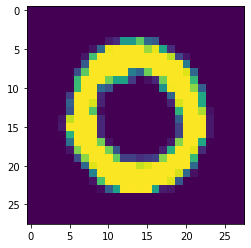

In [11]:
# Normalizing, helps with activation  
X_train=X_train/255.0
test=test/255.0

# Reshaping, so it will fit in a convolutional neural network.
# Data was give as vectors
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
print('shape of an image:',X_train[0].shape)

# changing label into one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
print('second image label: {} It is a zero'.format(y_train[1]))
plt.imshow(X_train[1][:,:,0])

# Building 3 models 

In [12]:
small = Sequential()
small.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
small.add(MaxPool2D(pool_size=(2,2)))
small.add(Dropout(0.1))
small.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
small.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
small.add(Dropout(0.25))
small.add(Flatten())
small.add(Dense(64, activation = "relu"))
small.add(Dropout(0.1))
small.add(Dense(10, activation = "softmax"))
small.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
s_history = small.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

medium = Sequential()
medium.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
medium.add(MaxPool2D(pool_size=(2,2)))
medium.add(Dropout(0.1))
medium.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
medium.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
medium.add(Dropout(0.25))
medium.add(Flatten())
medium.add(Dense(128, activation = "relu"))
medium.add(Dropout(0.2))
medium.add(Dense(10, activation = "softmax"))
medium.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
m_history = medium.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

big = Sequential()
big.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
big.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
big.add(MaxPool2D(pool_size=(2,2)))
big.add(Dropout(0.25))
big.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
big.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
big.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
big.add(Dropout(0.25))
big.add(Flatten())
big.add(Dense(256, activation = "relu"))
big.add(Dropout(0.5))
big.add(Dense(10, activation = "softmax"))
big.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
b_history = big.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

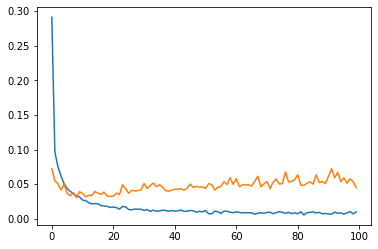

In [24]:
plt.plot(s_history.history['loss'])
plt.plot(s_history.history['val_loss'])
plt.show()

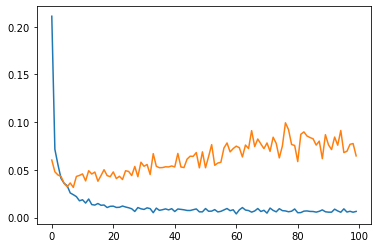

In [25]:
plt.plot(m_history.history['loss'])
plt.plot(m_history.history['val_loss'])
plt.show()

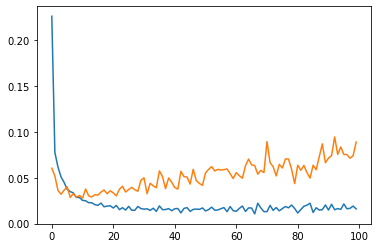

In [26]:
plt.plot(b_history.history['loss'])
plt.plot(b_history.history['val_loss'])
plt.show()

# Comparing models
- overfitting seems to be around 20 epochs
- medium model has the best accuracy at 20 epochs

In [36]:
print('small model, 20th epoch accuracy:', s_history.history['accuracy'][19])
print('medium model, 20th epoch accuracy:', m_history.history['accuracy'][19])
print('big model, 20th epoch accuracy:', b_history.history['accuracy'][19])

small model, 20th epoch accuracy: 0.9944345355033875
medium model, 20th epoch accuracy: 0.9961309432983398
big model, 20th epoch accuracy: 0.9940773844718933


# Retrain with early stoppage

In [14]:
m_history = medium.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=0)
predictions=medium.predict(test)

# Submission example

In [17]:
sample=pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


# Preparing submission

In [18]:
predictions=np.argmax(predictions, axis=1)
predictions=pd.Series(predictions, name='Label')
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)

# Results
- the submission accuracy was 98.821%